In [68]:
import pandas as pd
import numpy as np

In [69]:
#read TSV data file
train_df = pd.read_csv("train.tsv", delimiter='\t')
test_df  = pd.read_csv("test.tsv", delimiter='\t')


In [70]:
train_df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [71]:
train_df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [72]:
test_df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

In [73]:
test_df.head()


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [75]:
#shape of all data
print("train - ",train_df.shape)
print("test - ",test_df.shape)
# print("Submission - ",sub_df.shape)


train -  (156060, 4)
test -  (66292, 3)


In [76]:
print(train_df.Sentiment.value_counts(normalize=True).sort_index())

0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


<Axes: >

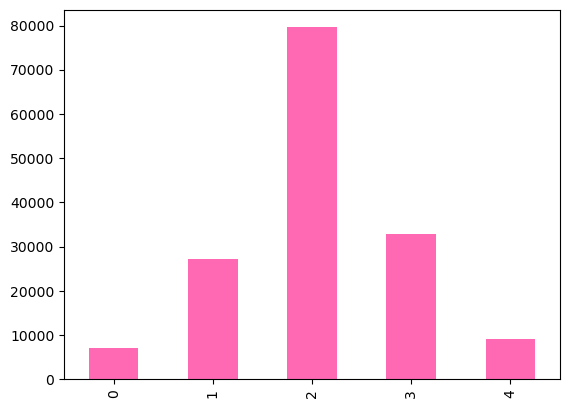

In [77]:
train_df.Sentiment.value_counts().sort_index().plot(kind='bar',color='hotpink')

<Axes: title={'center': 'Pie chart of Sentiment Class'}, ylabel='Sentiment'>

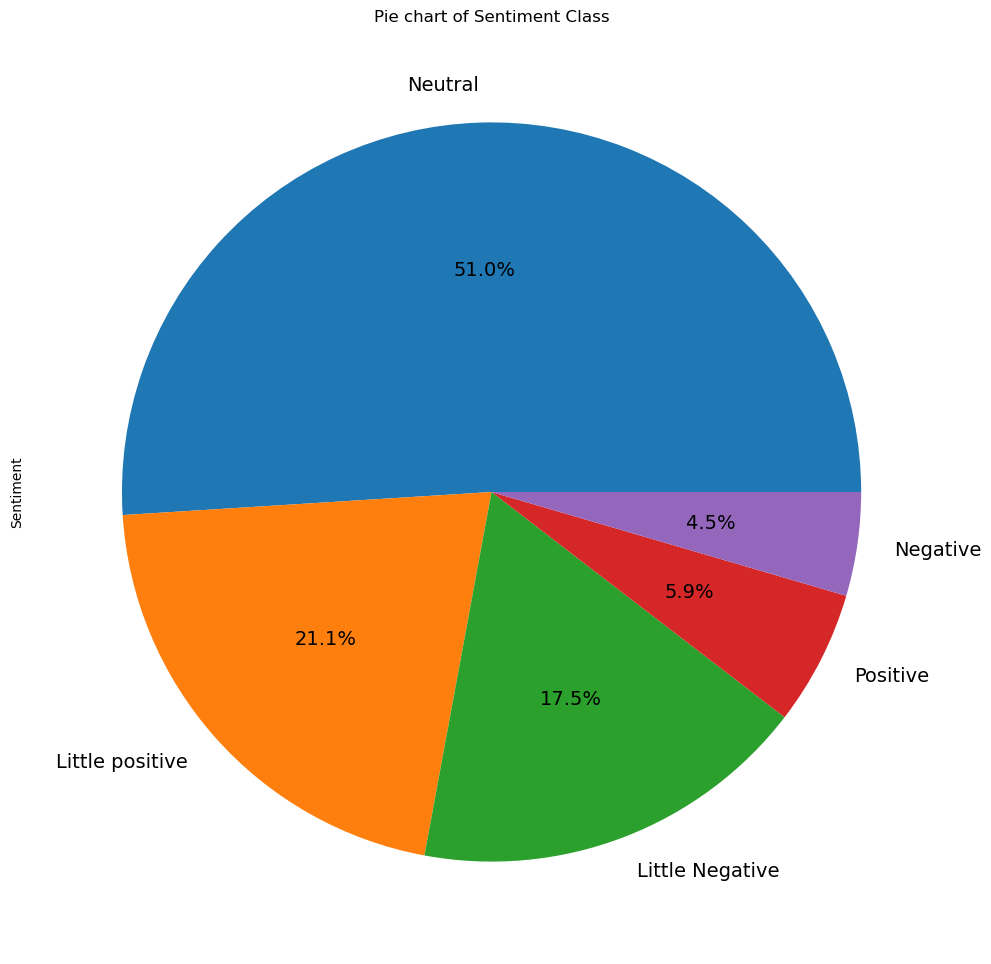

In [78]:
df2=train_df.copy(deep=True)
pie1=pd.DataFrame(df2['Sentiment'].replace(0,'Negative').replace(1,'Little Negative').replace(2,'Neutral').replace(3,'Little positive').replace(4,'Positive').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Sentiment Class',y = 'Sentiment', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

In [79]:
#this will give us some random samples of our data
train_df.Phrase.sample(10).values

array(['with British children rediscovering the power of fantasy during wartime',
       'should be relegated to a dark video store corner',
       'screenplay to keep the film entertaining',
       'about their lives , loves and the art',
       'The Importance of Being Earnest',
       'J. Lo will earn her share of the holiday box office pie , although this movie makes one thing perfectly clear',
       'what a',
       'often looks like an episode of the TV show Blind Date , only less technically proficient and without the pop-up comments .',
       'so heartwarmingly motivate',
       "Entertainment more disposable than Hanna-Barbera 's half-hour cartoons"],
      dtype=object)

In [80]:
train_df.Phrase

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [81]:
#some Phrases with 0-Sentiment
train_df[train_df.Sentiment == 0].Phrase.values[:10]

array(['would have a hard time sitting through this one',
       'have a hard time sitting through this one',
       'Aggressive self-glorification and a manipulative whitewash',
       'self-glorification and a manipulative whitewash',
       'Trouble Every Day is a plodding mess .', 'is a plodding mess',
       'plodding mess', 'could hate it for the same reason', 'hate it',
       'hate'], dtype=object)

In [82]:
#some Phrases with 1-Sentiment
train_df[train_df.Sentiment == 1].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'but none of which amounts to much of a story',
       'none of which amounts to much of a story',
       "Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
       ', I suspect , would have a hard time sitting through this one .',
       'would have a hard time sitting through this one .',
       'a hard time sitting through this one', 'a hard time', 'hard time'],
      dtype=object)

In [83]:
#some Phrases with 2-Sentiment
train_df[train_df.Sentiment == 2].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose',
       'demonstrating the adage'], dtype=object)

In [84]:
#some Phrases with 3-Sentiment
train_df[train_df.Sentiment == 3].Phrase.values[:10]

array(['good for the goose', 'good', 'amuses',
       'This quiet , introspective and entertaining independent',
       'quiet , introspective and entertaining',
       ', introspective and entertaining',
       'introspective and entertaining', 'introspective and',
       'is worth seeking .', 'fans'], dtype=object)

In [85]:
# some Phrases with 4-Sentiment
train_df[train_df.Sentiment == 4].Phrase.values[:10]

array(['This quiet , introspective and entertaining independent is worth seeking .',
       'quiet , introspective and entertaining independent',
       'entertaining', 'is worth seeking',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder',
       'thrilling',
       'A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .',
       'nearly epic',
       'rooted in a sincere performance by the title character undergoing midlife crisis .'],
      dtype=object)

In [86]:
train_df.shape,test_df.shape

((156060, 4), (66292, 3))

In [87]:
#import required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [88]:
# Download NLTK's Punkt tokenizer models if you haven't already
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
#setup for english language
stemmer  = SnowballStemmer(language='english')

In [91]:
#function to create tokenizer
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [92]:
# test tokenize function
tokenize("Hey how are you going")

['hey', 'how', 'are', 'you', 'go']

In [93]:
#creating stopword for engilish language
eng_stopword = stopwords.words('english')

In [94]:
#here are some english stop words
', '.join(eng_stopword[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [95]:
#select some stopwords
selected_stopwords = eng_stopword[:115]

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
#creating vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words = selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [98]:
vectorizer.fit(train_df.Phrase)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'll', 'onc', 'ourselv', 're', 'themselv', 've', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x00000199006B52D0>)

In [99]:
len(vectorizer.vocabulary_)

2000

In [100]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '&', "'", "' `", "''", "'d", "'d expect", "'m", "'s",
       "'s -rrb-", "'s also", "'s best", "'s film", "'s go", "'s good",
       "'s hard", "'s just", "'s like", "'s movi", "'s no", "'s not",
       "'s noth", "'s perform", "'s so", "'s someth", "'s still",
       "'s too", "'s veri", "'s work", '*', '* \\', ',', ", '", ", 's",
       ', ,', ', `', ', ``', ', also', ', amus', ', becaus', ', charact',
       ', direct', ', doe', ', emot', ', especi', ', even', ', feel',
       ', film', ', funni', ', good', ', intellig', ', just', ', least',
       ', like', ', ll', ', love', ', make', ', movi', ", n't", ', never',
       ', no', ', not', ', often', ', one', ', onli', ', rather', ', re',
       ', realli', ', should', ', so', ', sometim', ', still', ', though',
       ', time', ', too', ', ultim', ', veri', ', visual', ', well',
       ', will', ', would', ', yet', '-', '- ,', '--', "-- 's", '-- ,',
       '-lrb-', '-lrb- -rrb-', '-rrb-', '-rrb- ,', '.', ". '", '. `

In [101]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [102]:
%%time
inputs = vectorizer.transform(train_df.Phrase)

CPU times: total: 18.7 s
Wall time: 31.5 s


In [103]:
inputs.shape

(156060, 2000)

In [104]:
inputs.toarray()[0][:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10508068, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [105]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [106]:
%%time
test_inputs = vectorizer.transform(test_df.Phrase)

CPU times: total: 7.48 s
Wall time: 12.9 s


In [107]:
test_inputs.shape

(66292, 2000)

In [108]:
#take train size to split test data from training data
TRAIN_SIZE = 100_000

In [109]:
#creating inputs and targets for train data
train_inputs = inputs[:TRAIN_SIZE]
train_targets = train_df.Sentiment[:TRAIN_SIZE]

In [110]:
#checking the shape of targets to know the data range is samem or not
train_inputs.shape,train_targets.shape

((100000, 2000), (100000,))

In [111]:
#creating inputs and targets for validation data
val_inputs = inputs[TRAIN_SIZE:]
val_targets = train_df.Sentiment[TRAIN_SIZE:]

In [112]:
#checking the shape of targets to know the data range is samem or not
val_inputs.shape,val_targets.shape

((56060, 2000), (56060,))

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [114]:
%%time
model.fit(train_inputs,train_targets)

CPU times: total: 7 s
Wall time: 2 s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
train_preds = model.predict(train_inputs)

In [116]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [117]:
train_preds

array([3, 2, 2, ..., 1, 2, 2], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
print("Accuracy Score of prediction on training data-->",accuracy_score(train_targets,train_preds))

Accuracy Score of prediction on training data--> 0.64154


In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#try with test(validation) data
val_pred_1 = model.predict(val_inputs)

In [121]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_1))

Accuracy Score of prediction on validation data--> 0.5791295041027471
